# LEGO Dataset Analysis

<img src="assets/bricks.jpg">

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: How many different colours does the LEGO company produce?

In [2]:
colors_df = pd.read_csv("data/colors.csv").iloc[:, 1:]

In [3]:
colors_df

,name,rgb,is_trans
0,[Unknown],0033B2,f
1,Black,05131D,f
2,Blue,0055BF,f
3,Green,237841,f
4,Dark Turquoise,008F9B,f
...,...,...,...
262,Reddish Orange,CA4C0B,f
263,Sienna Brown,915C3C,f
264,Umber Brown,5E3F33,f
265,Opal Trans-Yellow,F5CD2F,t


In [4]:
colors_df.rgb.nunique()

226

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [5]:
colors_df.groupby('is_trans').count()

,name,rgb
is_trans,,
f,222,222
t,45,45


In [6]:
colors_df.is_trans.value_counts()

f    222
t     45
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="assets/lego_themes.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="assets/lego_sets.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [7]:
sets_df = pd.read_csv("data/sets.csv")

In [8]:
sets_df.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [9]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts,img_url
23108,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...
23109,YOTO-1,"1, 2, 3 Play with Me YOTO Cards",2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-1.jpg
23110,YOTO-2,A is for Alphabet,2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-2.jpg
23111,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...
23112,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0,https://cdn.rebrickable.com/media/sets/zx8000-...


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [10]:
sets_df.sort_values(by="year")[["name", "year"]].iloc[0]

name    Small Brick Set (ABB)
year                     1949
Name: 13929, dtype: object

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
sets_df[sets_df["year"] == 1949].set_num.nunique()

5

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [12]:
sets_df.sort_values(by="num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts,img_url
4475,31203-1,World Map,2021,709,11695,https://cdn.rebrickable.com/media/sets/31203-1...
427,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...
21753,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,https://cdn.rebrickable.com/media/sets/bigbox-...
413,10294-1,Titanic,2021,721,9092,https://cdn.rebrickable.com/media/sets/10294-1...
394,10276-1,Colosseum,2020,721,9036,https://cdn.rebrickable.com/media/sets/10276-1...


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [13]:
releases_df = sets_df.groupby("year").count()
releases_df.head()

,set_num,name,theme_id,num_parts,img_url
year,,,,,
1949,5,5,5,5,5
1950,6,6,6,6,6
1953,4,4,4,4,4
1954,14,14,14,14,14
1955,39,39,39,39,39


In [14]:
releases_df.tail()

,set_num,name,theme_id,num_parts,img_url
year,,,,,
2021,1163,1163,1163,1163,1163
2022,1044,1044,1044,1044,1044
2023,1073,1073,1073,1073,1073
2024,753,753,753,753,753
2025,7,7,7,7,7


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib.

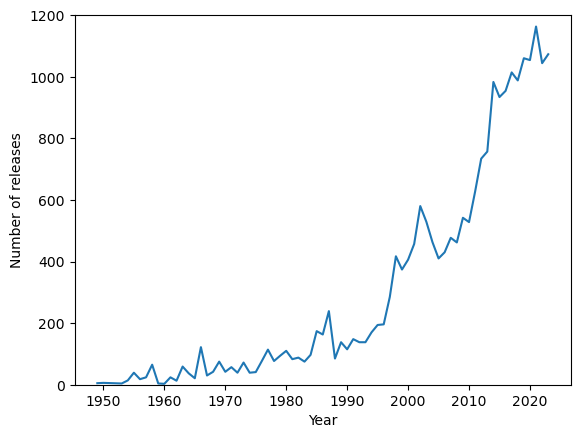

In [15]:
plt.xlabel("Year")
plt.ylabel("Number of releases")
plt.ylim((0,1200))
plt.plot(releases_df.index[:-2], releases_df.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [16]:
themes_by_year = sets_df.groupby("year").agg({"theme_id": pd.Series.nunique})

In [19]:
themes_by_year.rename(columns={"theme_id": "nr_of_themes"}, inplace=True)
themes_by_year

,nr_of_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,6
...,...
2021,98
2022,94
2023,103


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

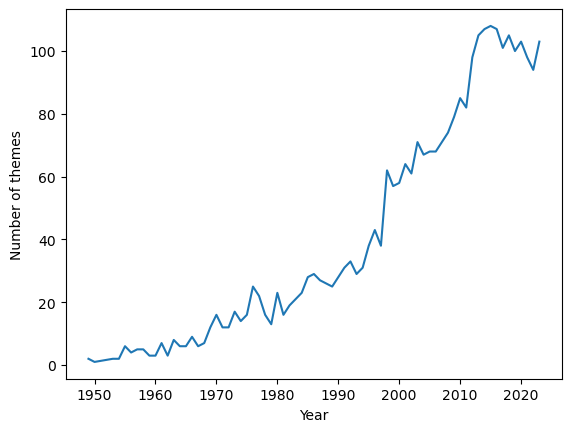

In [21]:
plt.xlabel("Year")
plt.ylabel("Number of themes")
plt.plot(themes_by_year[:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Num of themes')

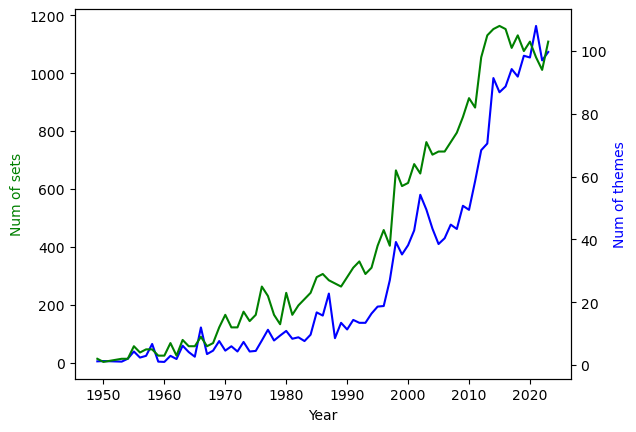

In [26]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(releases_df.index[:-2], releases_df.set_num[:-2], color="b")
ax2.plot(themes_by_year.index[:-2], themes_by_year[:-2], color="g")

ax1.set_xlabel("Year")
ax1.set_ylabel("Num of sets", color="g")
ax2.set_ylabel("Num of themes", color="b")

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [28]:
parts_per_set = sets_df.groupby("year").agg({"num_parts": pd.Series.mean})

In [32]:
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,12.205128
...,...
2021,228.226999
2022,270.184866
2023,280.548928


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

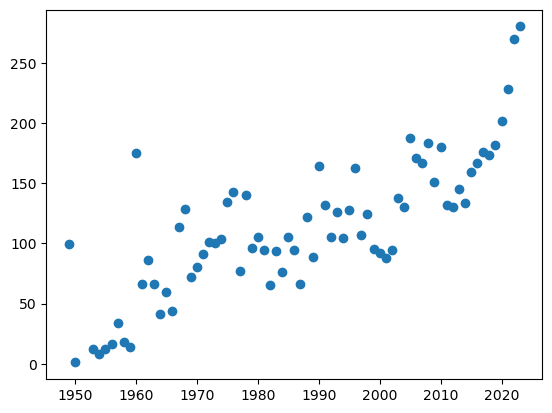

In [31]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

There is an upward trend in size and complexity of sets based on the average number of parts.

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

<img src="assets\rebrickable_schema.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [36]:
themes_df = pd.read_csv("data/themes.csv")

In [39]:
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0
...,...,...,...
459,762,Series 26 Minifigures,535.0
460,763,Despicable Me 4,NaN
461,764,The Legend of Zelda,NaN
462,765,Wicked,NaN


In [38]:
themes_df[themes_df["name"]=="Star Wars"]

,id,name,parent_id
5,18,Star Wars,1.0
74,158,Star Wars,NaN
95,209,Star Wars,207.0
122,261,Star Wars,258.0


In [40]:
sets_df[sets_df["theme_id"] == 18]

,set_num,name,year,theme_id,num_parts,img_url
12925,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1,https://cdn.rebrickable.com/media/sets/65081-1...
17243,8000-1,Pit Droid,2000,18,223,https://cdn.rebrickable.com/media/sets/8000-1.jpg
17250,8001-1,Battle Droid,2000,18,336,https://cdn.rebrickable.com/media/sets/8001-1.jpg
17261,8002-1,Destroyer Droid,2000,18,567,https://cdn.rebrickable.com/media/sets/8002-1.jpg
17300,8007-1,C-3PO,2001,18,339,https://cdn.rebrickable.com/media/sets/8007-1.jpg
17301,8008-1,Stormtrooper,2001,18,361,https://cdn.rebrickable.com/media/sets/8008-1.jpg
17302,8009-1,R2-D2,2002,18,239,https://cdn.rebrickable.com/media/sets/8009-1.jpg
17303,8010-1,Darth Vader,2002,18,388,https://cdn.rebrickable.com/media/sets/8010-1.jpg
17315,8011-1,Jango Fett,2002,18,425,https://cdn.rebrickable.com/media/sets/8011-1.jpg
17320,8012-1,Super Battle Droid,2002,18,378,https://cdn.rebrickable.com/media/sets/8012-1.jpg


In [41]:
sets_df[sets_df["theme_id"] == 158]

,set_num,name,year,theme_id,num_parts,img_url
2207,20006-1,Clone Turbo Tank,2008,158,64,https://cdn.rebrickable.com/media/sets/20006-1...
2218,20007-1,Republic Attack Cruiser,2009,158,84,https://cdn.rebrickable.com/media/sets/20007-1...
2231,20009-1,AT-TE Walker,2009,158,94,https://cdn.rebrickable.com/media/sets/20009-1...
2234,20010-1,Republic Gunship,2009,158,94,https://cdn.rebrickable.com/media/sets/20010-1...
2242,20016-1,Imperial Shuttle,2010,158,70,https://cdn.rebrickable.com/media/sets/20016-1...
...,...,...,...,...,...,...
23068,VP-4,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-4.jpg
23071,VP-8,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-8.jpg
23106,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
23107,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...


In [42]:
sets_df[sets_df["theme_id"] == 209]

,set_num,name,year,theme_id,num_parts,img_url
15788,75023-1,Star Wars Advent Calendar 2013,2013,209,254,https://cdn.rebrickable.com/media/sets/75023-1...
15821,75056-1,Star Wars Advent Calendar 2014,2014,209,275,https://cdn.rebrickable.com/media/sets/75056-1...
15855,75097-1,Star Wars Advent Calendar 2015,2015,209,291,https://cdn.rebrickable.com/media/sets/75097-1...
15906,75146-1,Star Wars Advent Calendar 2016,2016,209,282,https://cdn.rebrickable.com/media/sets/75146-1...
15948,75184-1,Star Wars Advent Calendar 2017,2017,209,309,https://cdn.rebrickable.com/media/sets/75184-1...
15981,75213-1,Star Wars Advent Calendar 2018,2018,209,307,https://cdn.rebrickable.com/media/sets/75213-1...
16020,75245-1,Star Wars Advent Calendar 2019,2019,209,280,https://cdn.rebrickable.com/media/sets/75245-1...
16056,75279-1,Star Wars Advent Calendar 2020,2020,209,311,https://cdn.rebrickable.com/media/sets/75279-1...
16082,75307-1,Star Wars Advent Calendar 2021,2021,209,335,https://cdn.rebrickable.com/media/sets/75307-1...
16119,75340-1,Star Wars Advent Calendar 2022,2022,209,329,https://cdn.rebrickable.com/media/sets/75340-1...


In [43]:
sets_df[sets_df["theme_id"] == 261]

,set_num,name,year,theme_id,num_parts,img_url
20724,9748-1,Droid Developer Kit,1999,261,658,https://cdn.rebrickable.com/media/sets/9748-1.jpg
20730,9754-1,Dark Side Developer Kit,2000,261,578,https://cdn.rebrickable.com/media/sets/9754-1.jpg


### Merging (i.e., Combining) DataFrames based on a Key


In [49]:
set_theme_count_df = sets_df["theme_id"].value_counts()

In [50]:
set_theme_count_df = pd.DataFrame({'id' : set_theme_count_df.index, 'set_count': set_theme_count_df.values})

In [51]:
set_theme_count_df.head()

,id,set_count
0,158,934
1,503,729
2,501,692
3,494,595
4,435,540


In [52]:
merged_df = pd.merge(set_theme_count_df, themes_df, on="id")

In [53]:
merged_df.head()

,id,set_count,name,parent_id
0,158,934,Star Wars,NaN
1,503,729,Key Chain,501.0
2,501,692,Gear,NaN
3,494,595,Friends,NaN
4,435,540,Ninjago,NaN


<BarContainer object of 15 artists>

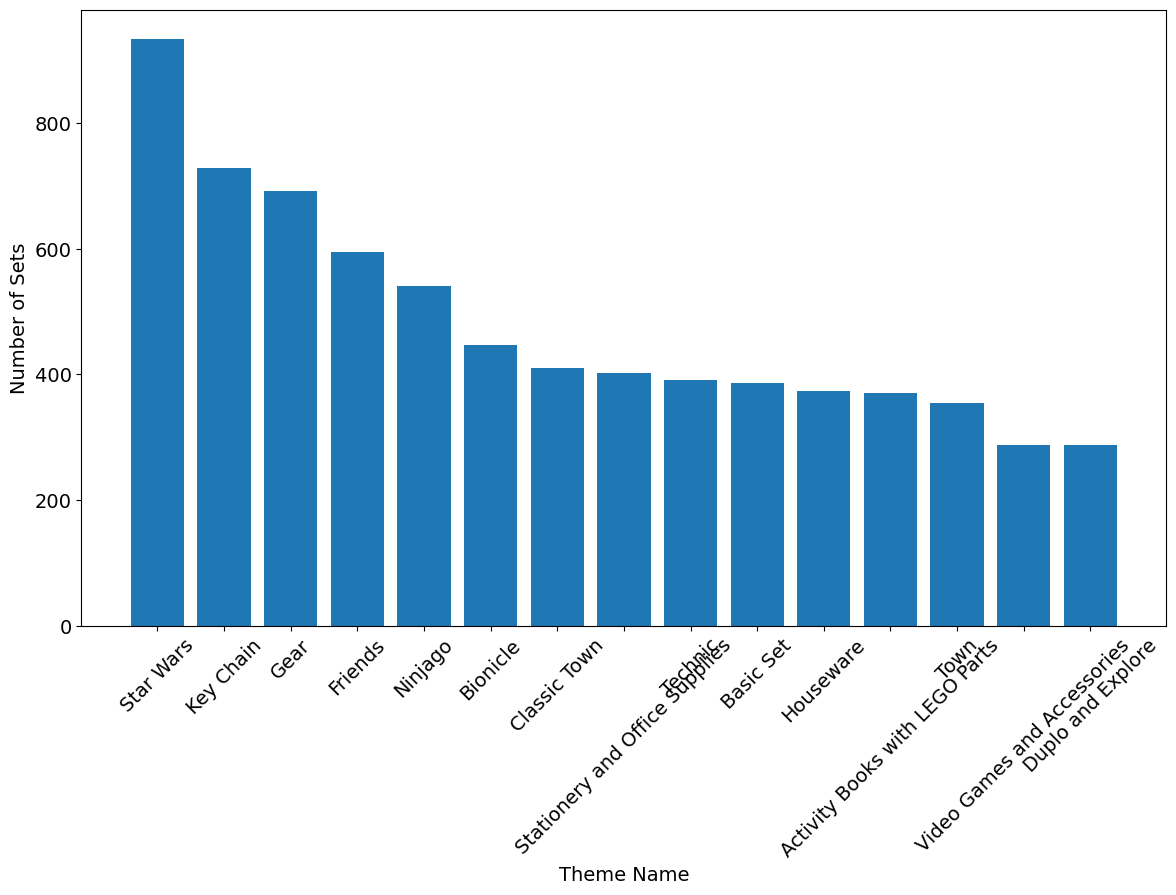

In [59]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Number of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:15], merged_df.set_count[:15])